<a href="https://colab.research.google.com/github/MDropsy/Keras-vis-exemple/blob/master/Keras_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model visualization

## Imports

In [3]:
!pip install git+https://github.com/raghakot/keras-vis.git

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-uoxrfzhr
  Running command git clone -q https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-uoxrfzhr
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38886 sha256=e1b3ee3971baa33d18ed42b4cff5bca627a4187aa1338e64de9857feb30be21c
  Stored in directory: /tmp/pip-ephem-wheel-cache-5f3a30j0/wheels/c5/ae/e7/b34d1cb48b1898f606a5cce08ebc9521fa0588f37f1e590d9f
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


In [5]:
!pip uninstall tensorflow
!pip install tensorflow==1.8
!pip uninstall keras
!pip install keras==2.2.0

Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 49.1MB 65kB/s 
     |████████████████████████████████| 3.1MB 51.8MB/s 
     |████████████████████████████████| 890kB 57.0MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107222 sha256=d4837df0ff3c90aa55c6765961165aad8f4dd66d5528f152d033256b1f8ae092
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing inst

Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/README.md
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/mkdocs.yml
    /usr/local/lib/python3.6/dist-packages/docs/templates/css/extras.css
    /usr/local/lib/python3.6/dist-packages/docs/templates/visualizations/activation_maximization.md
    /usr/local/lib/python3.6/dist-packages/docs/templates/visualizations/class_activation_maps.md
    /usr/local/lib/python3.6/dist-packages/docs/templates/visualizations/saliency.md
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 307kB 16.2MB/s 
     |████████████████████████████

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend  
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations

from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarn

# Model

### Datas

In [2]:
batch_size = 32
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Model creation

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='preds'))

### Model fitting

In [15]:
epochs = 8

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 215s 4ms/step - loss: 0.1886 - acc: 0.9430 - val_loss: 0.0533 - val_acc: 0.9829
Epoch 2/8
60000/60000 [==============================] - 217s 4ms/step - loss: 0.0795 - acc: 0.9760 - val_loss: 0.0335 - val_acc: 0.9889
Epoch 3/8
60000/60000 [==============================] - 214s 4ms/step - loss: 0.0610 - acc: 0.9820 - val_loss: 0.0310 - val_acc: 0.9888
Epoch 4/8
60000/60000 [==============================] - 214s 4ms/step - loss: 0.0481 - acc: 0.9851 - val_loss: 0.0319 - val_acc: 0.9902
Epoch 5/8
60000/60000 [==============================] - 213s 4ms/step - loss: 0.0421 - acc: 0.9868 - val_loss: 0.0324 - val_acc: 0.9895
Epoch 6/8
60000/60000 [==============================] - 213s 4ms/step - loss: 0.0350 - acc: 0.9892 - val_loss: 0.0297 - val_acc: 0.9918
Epoch 7/8
60000/60000 [==============================] - 212s 4ms/step - loss: 0.0323 - acc: 0.9898 - val_loss: 0.0303 - val_acc

In [19]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [21]:
print(f'Test accuracy is {test_acc*100} %')

Test accuracy is 99.4 %


### Visualization

#### Dense layer viz

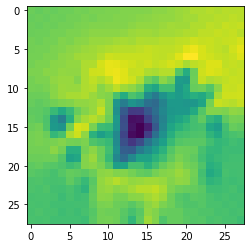

In [57]:
# Swap softmax with linear
layer_idx = utils.find_layer_idx(model, 'preds')
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# This is the output node we want to maximize.
fil_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=fil_idx)
plt.imshow(img[...,0])

#### Activation maximization

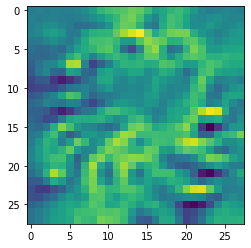

In [48]:
img = visualize_activation(model, layer_idx, filter_indices=fil_idx, input_range=(0., 1.))
plt.imshow(img[..., 0])

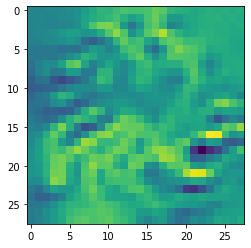

In [50]:
img = visualize_activation(model, layer_idx, filter_indices=fil_idx, input_range=(0., 1.))
plt.imshow(img[..., 0])

#### Numbers perception

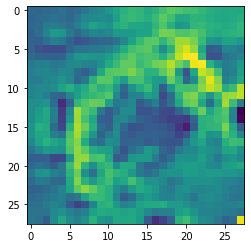

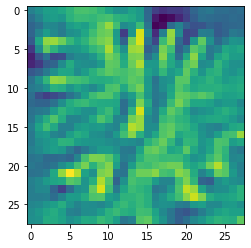

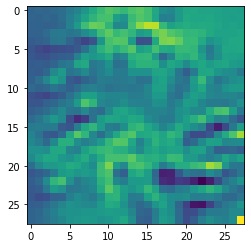

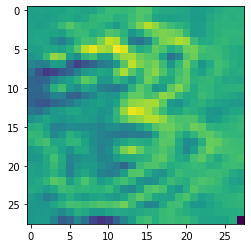

In [53]:
for output_idx in np.arange(0 ,4):
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.imshow(img[..., 0])

# Deployment

### Import model

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

df = pd.read_csv("https://raw.githubusercontent.com/kaustubhgupta/Technocolab-Final-Project/master/Data/cleaned.csv",  index_col=None)
X = df.drop(['track_id', 'genre_top'], axis=1)
y = df.genre_top

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

Pkl_Filename = "model_tree.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(tree, file)

### Create data class needed for FastAPI

This data class allows FastAPI to validate the inputs to be sent to the model and if any wrong input is given, it simply raises the error without giving it to the model.

In [61]:
! pip install pydantic

     |████████████████████████████████| 9.2MB 17.0MB/s 


In [62]:
from pydantic import BaseModel

class Music(BaseModel):
    acousticness: float 
    danceability: float 
    energy: float 
    instrumentalness: float 
    liveness: float 
    speechiness: float 
    tempo: float 
    valence: float
    class Config:
        schema_extra = {
            "example": {
                "acousticness": 0.838816, 
                "danceability": 0.542950, 
                "energy": 0.669215,
                "instrumentalness": 0.000006,
                "liveness": 0.105610,
                "speechiness": 0.391221,
                "tempo": 111.894,
                "valence": 0.796073
            }
        }

### Endpoint creation with FastAPI

In [64]:
!pip install fastapi

     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 


In [65]:
from fastapi import FastAPI

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("model_tree.pkl", "rb"))

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predict')
def get_music_category(data: Music):
    received = data.dict()
    acousticness = received['acousticness']
    danceability = received['danceability']
    energy = received['energy']
    instrumentalness = received['instrumentalness']
    liveness = received['liveness']
    speechiness = received['speechiness']
    tempo = received['tempo']
    valence = received['valence']
    pred_name = model.predict([[acousticness, danceability, energy,
                                instrumentalness, liveness, speechiness, tempo, valence]]).tolist()[0]
    return {'prediction': pred_name}

### ColabCode "The magic touch"

#### Install

In [67]:
!pip install colabcode

     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 8.3MB 29.8MB/s 
     |████████████████████████████████| 61kB 11.4MB/s 
     |████████████████████████████████| 194kB 58.2MB/s 
     |████████████████████████████████| 430kB 49.3MB/s 
     |████████████████████████████████| 51kB 9.6MB/s 
     |████████████████████████████████| 112kB 63.2MB/s 
     |████████████████████████████████| 71kB 12.2MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
     |████████████████████████████████| 102kB 15.4MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.1-cp36-none-any.whl size=18822 sha256=2c4eaead8c6f7a8c7c1d80009493717c5277540bb80a8d91cdbdd6bb36d05f64
  Stored in directory: /root/.cache/pip/wheels/94/01/05/d39efb8f6b40a411354b4168ca9dda99e6f8d586e458e97551
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=48b2d0eedbc9b003c573b89090d25fad6498672229a8f601f36d025b4d64acaf
  Stored in directory: /root/

#### Server

In [68]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

In [69]:
server.run_app(app=app)

Public URL: NgrokTunnel: "http://2b5bec3e32e4.ngrok.io" -> "http://localhost:10000"


INFO:     Started server process [200]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)


INFO:     212.239.132.203:0 - "GET / HTTP/1.1" 200 OK
INFO:     212.239.132.203:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     212.239.132.203:0 - "GET /openapi.json HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [200]
